# Creación del dataset dsualmh

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 boiler

- 3 fan

- 4 freezer

- 5 television

- 6 vacuum cleaner

- 7 light


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [8]:
from nilmtk.dataset_converters import convert_ualmt
convert_ualmt('./data/ozm/', 'dsualmh.h5')


Path ualmt: ./data/ozm/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
          timestamp        W      VAR          VA        f      VLN        PF  \
0      1.643793e+12  15.0957 -5.94440  187.123940  50.0110  243.978  0.657079   
1      1.643793e+12  15.3969 -6.37038  207.713360  50.0106  243.925  0.638892   
2      1.643793e+12  14.7063 -5.62044  163.500422  50.0106  243.976  0.634458   
3      1.643793e+12  15.4979 -6.30862  215.112895  50.0102  243.971  0.652569   
4      1.643793e+12  15.3228 -5.62764  202.446986  50.0100  243.933  0.655938   
...             ...      ...      ...         ...      ...      ...       ...   
48511  1.643803e+12  13.3789 -6.02801  103.210865  50.0223  242.323  0.645517   
48512  1.643803e+12  12.3869 -5.94603   73.183788  50.0223  242.367  0.635764   
48513  1.643803e+12  12.4862 -5.49164   75.746262  50.0227  242.406  0.644249   
48514  1.643

.......Sorting index
physical_quantity                   power                       frequency  \
type                               active reactive    apparent              
2022-02-02 10:16:17.664000+01:00  15.0957 -5.94440  187.123947  50.011002   
2022-02-02 10:16:17.864000+01:00  15.3969 -6.37038  207.713364  50.010601   
2022-02-02 10:16:18.064000+01:00  14.7063 -5.62044  163.500427  50.010601   
2022-02-02 10:16:18.264000+01:00  15.4979 -6.30862  215.112900  50.010201   
2022-02-02 10:16:18.464000+01:00  15.3228 -5.62764  202.446991  50.009998   
...                                   ...      ...         ...        ...   
2022-02-02 12:57:59.413000+01:00  13.3789 -6.02801  103.210861  50.022301   
2022-02-02 12:57:59.613000+01:00  12.3869 -5.94603   73.183784  50.022301   
2022-02-02 12:57:59.813000+01:00  12.4862 -5.49164   75.746262  50.022701   
2022-02-02 12:58:00.013000+01:00  12.2686 -5.76766   70.243980  50.022499   
2022-02-02 12:58:00.213000+01:00  12.4107 -6.14624   73

File  1  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    2 .csv
..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.643793e+12  3.15377 -0.320780  3.114550  50.0090  234.138  0.311626   
1      1.643793e+12  3.01996  0.214559  3.044963  50.0083  234.082  0.292929   
2      1.643793e+12  3.19063 -0.265590  3.156256  50.0080  234.111  0.311567   
3      1.643793e+12  3.17792  0.009857  3.171257  50.0080  234.132  0.307465   
4      1.643793e+12  2.92828 -0.015573  2.932795  50.0080  234.127  0.285350   
...             ...      ...       ...       ...      ...      ...       ...   
48511  1.643803e+12  1.98335  0.100063  2.241857  50.0198  232.598  0.214833   
48512  1.643803e+12  2.50022  0.347235  2.632458  50.0202  232.659  0.262371   
48513  1.643803e+12  2.

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2022-02-02 10:16:17.675000+01:00  3.15377 -0.320780  3.114550  50.008999   
2022-02-02 10:16:17.872000+01:00  3.01996  0.214559  3.044963  50.008301   
2022-02-02 10:16:18.069000+01:00  3.19063 -0.265590  3.156256  50.007999   
2022-02-02 10:16:18.275000+01:00  3.17792  0.009857  3.171257  50.007999   
2022-02-02 10:16:18.472000+01:00  2.92828 -0.015573  2.932795  50.007999   
...                                   ...       ...       ...        ...   
2022-02-02 12:57:59.402000+01:00  1.98335  0.100063  2.241857  50.019798   
2022-02-02 12:57:59.599000+01:00  2.50022  0.347235  2.632458  50.020199   
2022-02-02 12:57:59.796000+01:00  2.40756 -0.456279  2.456547  50.020500   
2022-02-02 12:58:00.002000+01:00  2.38157 -0.082187  2.481060  50.020500   
2022-02-02 12:58:00.199000+01:00  2.43522 -0.137954  2.513419  50.0

File  2  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    3 .csv
..Reading file csv
          timestamp        W       VAR         VA        f      VLN        PF  \
0      1.643793e+12  7.25848 -3.885250  12.376734  50.0110  243.978  0.739438   
1      1.643793e+12  7.37695  0.586471  12.950735  50.0106  243.925  0.178266   
2      1.643793e+12  7.22196 -3.174690  12.222902  50.0106  243.976  0.562593   
3      1.643793e+12  6.87873 -4.443890  10.850176  50.0102  243.971  0.581978   
4      1.643793e+12  6.43881 -3.529630   9.318674  50.0100  243.933  0.269962   
...             ...      ...       ...        ...      ...      ...       ...   
48511  1.643803e+12  1.56561 -2.746650   1.763242  50.0223  242.323  0.038044   
48512  1.643803e+12  4.40929 -4.172250   4.615623  50.0223  242.367  0.207254   
48513  1.64380

.......Sorting index
physical_quantity                   power                       frequency  \
type                               active  reactive   apparent              
2022-02-02 10:16:17.664000+01:00  7.25848 -3.885250  12.376734  50.011002   
2022-02-02 10:16:17.864000+01:00  7.37695  0.586471  12.950735  50.010601   
2022-02-02 10:16:18.064000+01:00  7.22196 -3.174690  12.222901  50.010601   
2022-02-02 10:16:18.264000+01:00  6.87873 -4.443890  10.850177  50.010201   
2022-02-02 10:16:18.464000+01:00  6.43881 -3.529630   9.318674  50.009998   
...                                   ...       ...        ...        ...   
2022-02-02 12:57:59.413000+01:00  1.56561 -2.746650   1.763242  50.022301   
2022-02-02 12:57:59.613000+01:00  4.40929 -4.172250   4.615623  50.022301   
2022-02-02 12:57:59.813000+01:00  6.10912 -3.752660   8.312802  50.022701   
2022-02-02 12:58:00.013000+01:00  5.57109 -3.783550   6.900238  50.022499   
2022-02-02 12:58:00.213000+01:00  5.92833 -3.828580   7

File  3  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    4 .csv
..Reading file csv
          timestamp         W       VAR        VA        f      VLN        PF  \
0      1.643793e+12  0.634897 -0.100012  1.576659  50.0083  233.361  0.075361   
1      1.643793e+12  0.501862 -0.162870  1.519634  50.0080  233.301  0.062180   
2      1.643793e+12  0.271555  0.004115  1.486595  50.0080  233.339  0.032769   
3      1.643793e+12  0.410615 -0.429794  1.439312  50.0077  233.322  0.050659   
4      1.643793e+12  0.557451 -0.178848  1.534625  50.0077  233.328  0.067945   
...             ...       ...       ...       ...      ...      ...       ...   
48512  1.643803e+12  0.560295 -0.104729  1.550661  50.0195  231.831  0.068362   
48513  1.643803e+12  0.281082 -0.404745  1.403736  50.0198  231.861  0.034377   
48514  1.64380

.......Sorting index
physical_quantity                    power                      frequency  \
type                                active  reactive  apparent              
2022-02-02 10:16:17.628000+01:00  0.634897 -0.100012  1.576658  50.008301   
2022-02-02 10:16:17.835000+01:00  0.501862 -0.162870  1.519634  50.007999   
2022-02-02 10:16:18.032000+01:00  0.271555  0.004115  1.486595  50.007999   
2022-02-02 10:16:18.229000+01:00  0.410615 -0.429794  1.439312  50.007702   
2022-02-02 10:16:18.435000+01:00  0.557451 -0.178848  1.534625  50.007702   
...                                    ...       ...       ...        ...   
2022-02-02 12:57:59.558000+01:00  0.560295 -0.104729  1.550661  50.019501   
2022-02-02 12:57:59.763000+01:00  0.281082 -0.404745  1.403736  50.019798   
2022-02-02 12:57:59.961000+01:00  0.132050 -0.177390  1.407178  50.020199   
2022-02-02 12:58:00.158000+01:00  0.282857 -0.134986  1.458520  50.020199   
2022-02-02 12:58:00.355000+01:00  0.092201 -0.224565  1

..Reading file csv
          timestamp         W       VAR         VA        f      VLN  \
0      1.643793e+12  12.62320 -2.935850  79.430157  50.0110  243.978   
1      1.643793e+12  13.01330 -0.035278  90.933195  50.0106  243.925   
2      1.643793e+12  12.30800 -1.983870  71.211383  50.0106  243.976   
3      1.643793e+12  11.68660 -4.013200  57.413319  50.0102  243.971   
4      1.643793e+12  12.33460 -2.993800  71.869988  50.0100  243.933   
...             ...       ...       ...        ...      ...      ...   
48511  1.643803e+12   9.82598 -2.289140  30.130497  50.0223  242.323   
48512  1.643803e+12  11.03830 -3.162660  45.860758  50.0223  242.367   
48513  1.643803e+12  10.98550 -2.070190  45.030629  50.0227  242.406   
48514  1.643803e+12  11.06740 -2.472790  46.326332  50.0225  242.370   
48515  1.643803e+12  10.26000 -3.716580  35.018485  50.0225  242.350   

             PF         A         VH1       VH2  ...      PH41      PH42  \
0      0.679814  0.076108  243.938905  0

.......Sorting index
physical_quantity                    power                       frequency  \
type                                active  reactive   apparent              
2022-02-02 10:16:17.664000+01:00  12.62320 -2.935850  79.430153  50.011002   
2022-02-02 10:16:17.864000+01:00  13.01330 -0.035278  90.933197  50.010601   
2022-02-02 10:16:18.064000+01:00  12.30800 -1.983870  71.211380  50.010601   
2022-02-02 10:16:18.264000+01:00  11.68660 -4.013200  57.413319  50.010201   
2022-02-02 10:16:18.464000+01:00  12.33460 -2.993800  71.869987  50.009998   
...                                    ...       ...        ...        ...   
2022-02-02 12:57:59.413000+01:00   9.82598 -2.289140  30.130497  50.022301   
2022-02-02 12:57:59.613000+01:00  11.03830 -3.162660  45.860760  50.022301   
2022-02-02 12:57:59.813000+01:00  10.98550 -2.070190  45.030628  50.022701   
2022-02-02 12:58:00.013000+01:00  11.06740 -2.472790  46.326332  50.022499   
2022-02-02 12:58:00.213000+01:00  10.26000 

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.643793e+12  5.07369 -3.85003  5.809157  50.0110  243.978  0.585986   
1      1.643793e+12  4.56161 -3.78620  4.866943  50.0106  243.925  0.476760   
2      1.643793e+12  5.58936 -3.93026  6.943495  50.0106  243.976  0.540988   
3      1.643793e+12  5.58604 -3.49818  6.937173  50.0102  243.971  0.630758   
4      1.643793e+12  5.16944 -3.64125  6.005668  50.0100  243.933  0.616410   
...             ...      ...      ...       ...      ...      ...       ...   
48511  1.643803e+12  4.11969 -2.96387  4.184757  50.0223  242.323  0.630946   
48512  1.643803e+12  4.83602 -3.64499  5.351807  50.0223  242.367  0.649369   
48513  1.643803e+12  4.59219 -3.76522  4.918748  50.0227  242.406  0.631628   
48514  1.643803e+12  4.15934 -3.69509  4.236228  50.0225  242.370  0.593773   
48515  1.643803e+12  4.55367 -3.26444  4.856861  50.0225  242.350  0.527659   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-02-02 10:16:17.664000+01:00  5.07369 -3.85003  5.809157  50.011002   
2022-02-02 10:16:17.864000+01:00  4.56161 -3.78620  4.866942  50.010601   
2022-02-02 10:16:18.064000+01:00  5.58936 -3.93026  6.943495  50.010601   
2022-02-02 10:16:18.264000+01:00  5.58604 -3.49818  6.937172  50.010201   
2022-02-02 10:16:18.464000+01:00  5.16944 -3.64125  6.005668  50.009998   
...                                   ...      ...       ...        ...   
2022-02-02 12:57:59.413000+01:00  4.11969 -2.96387  4.184757  50.022301   
2022-02-02 12:57:59.613000+01:00  4.83602 -3.64499  5.351807  50.022301   
2022-02-02 12:57:59.813000+01:00  4.59219 -3.76522  4.918748  50.022701   
2022-02-02 12:58:00.013000+01:00  4.15934 -3.69509  4.236228  50.022499   
2022-02-02 12:58:00.213000+01:00  4.55367 -3.26444  4.856862  50.022499   

phy

physical_quantity             power                      frequency  \
type                         active  reactive  apparent              
2022-02-02 10:16:17+01:00  4.817650 -3.818115  5.338050  50.010803   
2022-02-02 10:16:18+01:00  5.598462 -3.885558  6.991444  50.010040   
2022-02-02 10:16:19+01:00  5.541196 -3.595402  6.873528  50.008980   
2022-02-02 10:16:20+01:00  5.417912 -3.537510  6.584182  50.007900   
2022-02-02 10:16:21+01:00  5.450208 -3.852628  6.634721  50.006901   
...                             ...       ...       ...        ...   
2022-02-02 12:57:56+01:00  4.637020 -3.338632  5.012159  50.018242   
2022-02-02 12:57:57+01:00  4.493954 -3.363628  4.798400  50.020142   
2022-02-02 12:57:58+01:00  4.672342 -3.607270  5.070971  50.021702   
2022-02-02 12:57:59+01:00  4.480030 -3.440910  4.751081  50.022419   
2022-02-02 12:58:00+01:00  4.356505 -3.479765  4.546545  50.022499   

physical_quantity             voltage        pf   current     voltage  \
type            

Convertidos los metadatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsualmh.h5 que contiene los datos recopilados y metadatos del dataset.

In [9]:
#dataset de referencia 
dsualmh = DataSet('dsualmh.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [10]:
elec = dsualmh.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])
)

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [11]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [12]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [13]:
elec.mains().power_series_all_data().head()

2022-02-02 10:16:17+01:00    15.24630
2022-02-02 10:16:18+01:00    14.94546
2022-02-02 10:16:19+01:00    15.24516
2022-02-02 10:16:20+01:00    14.94808
2022-02-02 10:16:21+01:00    15.18322
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [14]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])
)

### Etiquetas de dispositivos

Tenenos 7 medidores, por lo que podemos asociarle una etiqueta para identificarlos biunivocamente. 

In [15]:
 labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Medidor Princ.', 'Medidor Ventilador', 'Medidor Nevera', 'Medidor TV', 'Medidor aspirador.','Medidor Hervidor']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [16]:
print_dict(dsualmh.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [17]:
print_dict(dsualmh.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [18]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]





# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [19]:
boiler_meter = elec['boiler']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [20]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [21]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': 'armonic1',
   'upper_limit': 100,
   'lower_limit': 0},
  {

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [22]:
boiler_meter.dominant_appliance()

Appliance(type='boiler', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [23]:
boiler_meter.total_energy() # kWh

active       1.101660
reactive     0.058289
apparent    13.429341
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [24]:
next(boiler_meter.load())

physical_quantity           voltage                             power  \
type                      armonic44 armonic28 armonic31     armonic12   
2022-02-02 10:16:17+01:00  0.018445  0.009887  0.124725  9.999999e-07   
2022-02-02 10:16:18+01:00  0.017054  0.011484  0.116302 -3.800000e-06   
2022-02-02 10:16:19+01:00  0.018058  0.007917  0.126510 -1.740000e-05   
2022-02-02 10:16:20+01:00  0.007963  0.014159  0.133420 -6.800000e-06   
2022-02-02 10:16:21+01:00  0.013616  0.014098  0.124469 -1.400000e-05   
...                             ...       ...       ...           ...   
2022-02-02 12:57:56+01:00  0.008672  0.008914  0.049793  9.999999e-07   
2022-02-02 12:57:57+01:00  0.015681  0.008596  0.046014 -4.800000e-06   
2022-02-02 12:57:58+01:00  0.005587  0.006949  0.055108 -2.400000e-06   
2022-02-02 12:57:59+01:00  0.011992  0.012539  0.058641  2.000001e-07   
2022-02-02 12:58:00+01:00  0.005355  0.013755  0.063985 -2.000000e-06   

physical_quantity                         voltage   current   voltage  \
type                          armonic42 armonic35 armonic33  armonic5   
2022-02-02 10:16:17+01:00  0.000000e+00  0.201479  0.000581  1.777146   
2022-02-02 10:16:18+01:00  6.600000e-06  0.195547  0.000538  1.781097   
2022-02-02 10:16:19+01:00 -3.200000e-06  0.205501  0.000712  1.768468   
2022-02-02 10:16:20+01:00  2.273737e-14  0.204046  0.000740  1.773833   
2022-02-02 10:16:21+01:00  6.600000e-06  0.226793  0.000436  1.784321   
...                                 ...       ...       ...       ...   
2022-02-02 12:57:56+01:00 -4.000000e-07  0.048551  0.000310  2.790658   
2022-02-02 12:57:57+01:00 -1.000000e-06  0.053374  0.000315  2.786958   
2022-02-02 12:57:58+01:00  1.400000e-06  0.046801  0.000321  2.765387   
2022-02-02 12:57:59+01:00  1.800000e-06  0.034197  0.000529  2.768303   
2022-02-02 12:58:00+01:00  0.000000e+00  0.055880  0.000466  2.800423   

physical_quantity           current   voltage  ...         power  \
type                      armonic16 armonic30  ...     armonic30   
2022-02-02 10:16:17+01:00  0.001412  0.020939  ... -5.000000e-06   
2022-02-02 10:16:18+01:00  0.000749  0.014773  ...  5.400000e-06   
2022-02-02 10:16:19+01:00  0.000906  0.012127  ... -2.000000e-07   
2022-02-02 10:16:20+01:00  0.000855  0.016558  ... -1.600000e-06   
2022-02-02 10:16:21+01:00  0.000675  0.010580  ... -1.600000e-06   
...                             ...       ...  ...           ...   
2022-02-02 12:57:56+01:00  0.000272  0.007990  ...  4.000000e-07   
2022-02-02 12:57:57+01:00  0.000529  0.011366  ... -1.000000e-06   
2022-02-02 12:57:58+01:00  0.000398  0.016147  ...  2.600000e-06   
2022-02-02 12:57:59+01:00  0.000615  0.008920  ... -1.000000e-06   
2022-02-02 12:58:00+01:00  0.000689  0.014076  ...  0.000000e+00   

physical_quantity                                   voltage   current  \
type                          armonic44  apparent armonic17  armonic6   
2022-02-02 10:16:17+01:00  7.000000e-06  5.338050  0.141695  0.001246   
2022-02-02 10:16:18+01:00 -2.200000e-06  6.991444  0.140711  0.001997   
2022-02-02 10:16:19+01:00 -1.400000e-06  6.873528  0.145176  0.001658   
2022-02-02 10:16:20+01:00  2.200000e-06  6.584182  0.135568  0.001551   
2022-02-02 10:16:21+01:00  2.800000e-06  6.634721  0.141436  0.001117   
...                                 ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  2.000000e-07  5.012159  0.324272  0.000823   
2022-02-02 12:57:57+01:00  2.400000e-06  4.798400  0.322437  0.000553   
2022-02-02 12:57:58+01:00 -1.600000e-06  5.070971  0.326533  0.000913   
2022-02-02 12:57:59+01:00  2.200000e-06  4.751081  0.313599  0.000949   
2022-02-02 12:58:00+01:00  1.000000e-06  4.546545  0.330487  0.001300   

physical_quantity                               voltage            \
type                       armonic7 armonic46 armonic47 armonic45   
2022-02-02 10:16:17+01:00  0.001155  0.000463  0.028958  0.055889   
2022-02-02 10:16:18+01:00  0.000910  0.000421  0.046175  0

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [25]:
next (boiler_meter.power_series())

2022-02-02 10:16:17+01:00    4.817650
2022-02-02 10:16:18+01:00    5.598462
2022-02-02 10:16:19+01:00    5.541196
2022-02-02 10:16:20+01:00    5.417912
2022-02-02 10:16:21+01:00    5.450208
                               ...   
2022-02-02 12:57:56+01:00    4.637020
2022-02-02 12:57:57+01:00    4.493954
2022-02-02 12:57:58+01:00    4.672342
2022-02-02 12:57:59+01:00    4.480030
2022-02-02 12:58:00+01:00    4.356505
Name: (power, active), Length: 9704, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

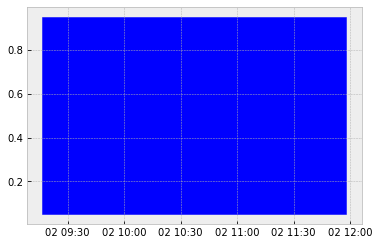

In [26]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [27]:
good_sections.combined()

[TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [28]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALMH::

In [29]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [30]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [31]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [32]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['pf', 'power', 'voltage', 'frequency', 'current']

In [33]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['pf', 'power', 'voltage', 'frequency', 'current']

In [34]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (boiler)


['pf', 'power', 'voltage', 'frequency', 'current']

In [35]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (fan)


['pf', 'power', 'voltage', 'frequency', 'current']

In [36]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (freezer)


['pf', 'power', 'voltage', 'frequency', 'current']

In [37]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (television)


['pf', 'power', 'voltage', 'frequency', 'current']

In [38]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)


['pf', 'power', 'voltage', 'frequency', 'current']

## Medidas disponibles relativas a la potencia


In [39]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [40]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [41]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [42]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [43]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [44]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [45]:
freezer = elec['freezer']
freezer.available_columns()

[('voltage', 'armonic44'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic31'),
 ('power', 'armonic12'),
 ('power', 'armonic42'),
 ('voltage', 'armonic35'),
 ('current', 'armonic33'),
 ('voltage', 'armonic5'),
 ('current', 'armonic16'),
 ('voltage', 'armonic30'),
 ('voltage', 'armonic1'),
 ('current', 'armonic47'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic3'),
 ('power', 'reactive'),
 ('voltage', 'armonic48'),
 ('current', 'armonic42'),
 ('current', 'armonic2'),
 ('voltage', 'armonic37'),
 ('current', 'armonic29'),
 ('current', 'armonic41'),
 ('voltage', 'armonic40'),
 ('current', 'armonic35'),
 ('current', 'armonic30'),
 ('voltage', 'armonic6'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic32'),
 ('power', 'armonic47'),
 ('power', 'active'),
 ('voltage', 'armonic33'),
 ('current', 'armonic45'),
 ('power', 'armonic7'),
 ('power', 'armonic22'),
 ('power', 'armonic10'),
 ('power', 'armonic14'),
 ('power', 'armonic37'),
 ('power',

In [46]:
boiler = elec['boiler']
boiler.available_columns()

[('voltage', 'armonic44'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic31'),
 ('power', 'armonic12'),
 ('power', 'armonic42'),
 ('voltage', 'armonic35'),
 ('current', 'armonic33'),
 ('voltage', 'armonic5'),
 ('current', 'armonic16'),
 ('voltage', 'armonic30'),
 ('voltage', 'armonic1'),
 ('current', 'armonic47'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic3'),
 ('power', 'reactive'),
 ('voltage', 'armonic48'),
 ('current', 'armonic42'),
 ('current', 'armonic2'),
 ('voltage', 'armonic37'),
 ('current', 'armonic29'),
 ('current', 'armonic41'),
 ('voltage', 'armonic40'),
 ('current', 'armonic35'),
 ('current', 'armonic30'),
 ('voltage', 'armonic6'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic32'),
 ('power', 'armonic47'),
 ('power', 'active'),
 ('voltage', 'armonic33'),
 ('current', 'armonic45'),
 ('power', 'armonic7'),
 ('power', 'armonic22'),
 ('power', 'armonic10'),
 ('power', 'armonic14'),
 ('power', 'armonic37'),
 ('power',

In [47]:
fan = elec['fan']
fan.available_columns()

[('voltage', 'armonic44'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic31'),
 ('power', 'armonic12'),
 ('power', 'armonic42'),
 ('voltage', 'armonic35'),
 ('current', 'armonic33'),
 ('voltage', 'armonic5'),
 ('current', 'armonic16'),
 ('voltage', 'armonic30'),
 ('voltage', 'armonic1'),
 ('current', 'armonic47'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic3'),
 ('power', 'reactive'),
 ('voltage', 'armonic48'),
 ('current', 'armonic42'),
 ('current', 'armonic2'),
 ('voltage', 'armonic37'),
 ('current', 'armonic29'),
 ('current', 'armonic41'),
 ('voltage', 'armonic40'),
 ('current', 'armonic35'),
 ('current', 'armonic30'),
 ('voltage', 'armonic6'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic32'),
 ('power', 'armonic47'),
 ('power', 'active'),
 ('voltage', 'armonic33'),
 ('current', 'armonic45'),
 ('power', 'armonic7'),
 ('power', 'armonic22'),
 ('power', 'armonic10'),
 ('power', 'armonic14'),
 ('power', 'armonic37'),
 ('power',

In [48]:
television = elec['television']
television.available_columns()

[('voltage', 'armonic44'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic31'),
 ('power', 'armonic12'),
 ('power', 'armonic42'),
 ('voltage', 'armonic35'),
 ('current', 'armonic33'),
 ('voltage', 'armonic5'),
 ('current', 'armonic16'),
 ('voltage', 'armonic30'),
 ('voltage', 'armonic1'),
 ('current', 'armonic47'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic3'),
 ('power', 'reactive'),
 ('voltage', 'armonic48'),
 ('current', 'armonic42'),
 ('current', 'armonic2'),
 ('voltage', 'armonic37'),
 ('current', 'armonic29'),
 ('current', 'armonic41'),
 ('voltage', 'armonic40'),
 ('current', 'armonic35'),
 ('current', 'armonic30'),
 ('voltage', 'armonic6'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic32'),
 ('power', 'armonic47'),
 ('power', 'active'),
 ('voltage', 'armonic33'),
 ('current', 'armonic45'),
 ('power', 'armonic7'),
 ('power', 'armonic22'),
 ('power', 'armonic10'),
 ('power', 'armonic14'),
 ('power', 'armonic37'),
 ('power',

In [49]:
vacuum_cleaner = elec['vacuum cleaner']
vacuum_cleaner.available_columns()

[('voltage', 'armonic44'),
 ('voltage', 'armonic28'),
 ('voltage', 'armonic31'),
 ('power', 'armonic12'),
 ('power', 'armonic42'),
 ('voltage', 'armonic35'),
 ('current', 'armonic33'),
 ('voltage', 'armonic5'),
 ('current', 'armonic16'),
 ('voltage', 'armonic30'),
 ('voltage', 'armonic1'),
 ('current', 'armonic47'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic3'),
 ('power', 'reactive'),
 ('voltage', 'armonic48'),
 ('current', 'armonic42'),
 ('current', 'armonic2'),
 ('voltage', 'armonic37'),
 ('current', 'armonic29'),
 ('current', 'armonic41'),
 ('voltage', 'armonic40'),
 ('current', 'armonic35'),
 ('current', 'armonic30'),
 ('voltage', 'armonic6'),
 ('voltage', 'armonic36'),
 ('power', 'armonic39'),
 ('voltage', 'armonic32'),
 ('power', 'armonic47'),
 ('power', 'active'),
 ('voltage', 'armonic33'),
 ('current', 'armonic45'),
 ('power', 'armonic7'),
 ('power', 'armonic22'),
 ('power', 'armonic10'),
 ('power', 'armonic14'),
 ('power', 'armonic37'),
 ('power',

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [50]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['pf', 'power', 'voltage', 'frequency', 'current']
Mediciones de Potencia disponibles - Dataset: ['armonic15', 'armonic16', 'armonic4', 'armonic25', 'armonic44', 'armonic13', 'armonic23', 'armonic1', 'armonic2', 'armonic26', 'armonic34', 'armonic38', 'armonic3', 'armonic9', 'armonic49', 'armonic8', 'armonic22', 'armonic29', 'armonic31', 'active', 'armonic35', 'armonic41', 'armonic19', 'armonic18', 'armonic14', 'armonic10', 'armonic20', 'armonic24', 'armonic45', 'armonic39', 'armonic6', 'armonic27', 'reactive', 'armonic30', 'armonic28', 'armonic36', 'armonic47', 'armonic33', 'armonic12', 'armonic48', 'apparent', 'armonic17', 'armonic32', 'armonic46', 'armonic42', 'armonic40', 'armonic5', 'armonic50', 'armonic37', 'armonic7', 'armonic43', 'armonic21', 'armonic11']

Medidas disponibles por cada medidor:
Medidor Princ.: ['pf', 'power', 'voltage', 'frequency', 'current']
Medidor Ventilador: ['pf', 'power', 'voltage', 'frequency', 'current']
Medidor Nevera: 

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

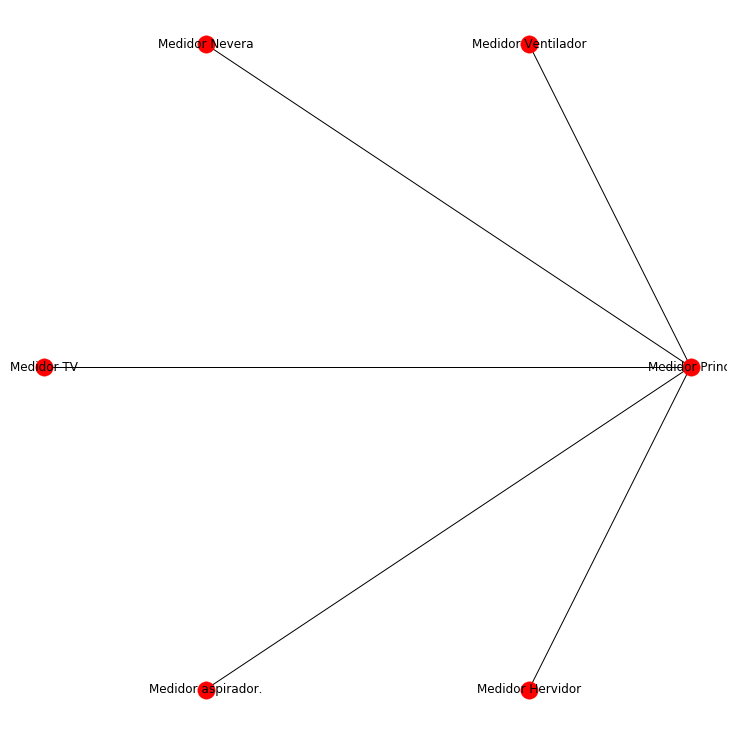

In [51]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [52]:
elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 6 (es decir todos menos el principal). 

In [53]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:8])]
df

,Medidor Ventilador,Medidor Nevera,Medidor TV,Medidor aspirador.,Medidor Hervidor
2022-02-02 10:16:00+01:00,436.930298,17.954218,39.310848,18.609200,250.311172
2022-02-02 10:17:00+01:00,1522.467896,43.220459,60.676174,41.796200,832.943604
2022-02-02 10:18:00+01:00,1507.484619,42.596241,58.401184,41.576984,823.910522
2022-02-02 10:19:00+01:00,1481.499878,42.179371,59.043556,41.534763,810.206299
2022-02-02 10:20:00+01:00,1487.745850,42.003288,59.041161,41.430031,812.386963
...,...,...,...,...,...
2022-02-02 12:54:00+01:00,2.611770,5.841594,0.308854,11.128838,4.650007
2022-02-02 12:55:00+01:00,2.666440,5.937994,0.334433,11.159833,4.660892
2022-02-02 12:56:00+01:00,2.679903,6.011952,0.252644,11.184495,4.647783
2022-02-02 12:57:00+01:00,2.638799,6.029858,0.271382,11.223354,4.623586


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [54]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:7])]
df

,Medidor Ventilador,Medidor Nevera,Medidor TV,Medidor aspirador.,Medidor Hervidor
2022-02-02 10:16:00+01:00,1.511064,-3.354744,10.773724,-4.422327,13.827636
2022-02-02 10:17:00+01:00,5.480077,-3.040452,15.653749,-9.082592,50.586582
2022-02-02 10:18:00+01:00,5.371400,-3.395517,15.130448,-9.175824,49.239399
2022-02-02 10:19:00+01:00,5.222862,-3.690959,14.724609,-9.317194,48.150627
2022-02-02 10:20:00+01:00,5.275593,-3.696784,14.797137,-9.450023,47.401402
...,...,...,...,...,...
2022-02-02 12:54:00+01:00,-0.208731,-3.618885,-0.051677,-2.688369,-3.480539
2022-02-02 12:55:00+01:00,-0.249659,-3.655366,-0.058075,-2.640547,-3.471927
2022-02-02 12:56:00+01:00,-0.201040,-3.579227,-0.032446,-2.628408,-3.466259
2022-02-02 12:57:00+01:00,-0.159421,-3.642658,-0.059790,-2.611041,-3.456803


Por ultimo, veamos la potencia aparente de los medidores del 2 al 6 (todos menos el principal).

In [55]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:7])]
df

,Medidor Ventilador,Medidor Nevera,Medidor TV,Medidor aspirador.,Medidor Hervidor
2022-02-02 10:16:00+01:00,inf,1.244050e+07,inf,4.711047e+07,inf
2022-02-02 10:17:00+01:00,inf,3.519612e+06,7.401198e+09,1.998983e+06,inf
2022-02-02 10:18:00+01:00,inf,3.040145e+06,6.236346e+08,2.145365e+06,inf
2022-02-02 10:19:00+01:00,inf,2.559435e+06,7.733521e+08,2.424222e+06,inf
2022-02-02 10:20:00+01:00,inf,2.430662e+06,7.781494e+08,2.314534e+06,inf
...,...,...,...,...,...
2022-02-02 12:54:00+01:00,2.654825,8.115088e+00,1.490867e+00,4.901978e+01,5.047424
2022-02-02 12:55:00+01:00,2.694937,9.680501e+00,1.496054e+00,5.061599e+01,5.069400
2022-02-02 12:56:00+01:00,2.710185,1.281587e+01,1.478277e+00,5.209932e+01,5.040105
2022-02-02 12:57:00+01:00,2.681170,1.981141e+01,1.479389e+00,5.569571e+01,5.000613


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [56]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2022-02-02 10:16:00+01:00 to 2022-02-02 12:58:00+01:00
Freq: 60S
Data columns (total 5 columns):
(Medidor Ventilador,)    163 non-null float32
(Medidor Nevera,)        163 non-null float32
(Medidor TV,)            163 non-null float32
(Medidor aspirador.,)    163 non-null float32
(Medidor Hervidor,)      163 non-null float32
dtypes: float32(5)
memory usage: 4.5 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 6(Vacuum Cleaner) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [57]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor 
df_vac

physical_quantity           voltage                             power  \
type                      armonic44 armonic28 armonic31     armonic12   
2022-02-02 10:16:17+01:00  0.018445  0.009887  0.124725  9.999999e-07   
2022-02-02 10:16:18+01:00  0.017054  0.011484  0.116302 -3.800000e-06   
2022-02-02 10:16:19+01:00  0.018058  0.007917  0.126510 -1.740000e-05   
2022-02-02 10:16:20+01:00  0.007963  0.014159  0.133420 -6.800000e-06   
2022-02-02 10:16:21+01:00  0.013616  0.014098  0.124469 -1.400000e-05   
...                             ...       ...       ...           ...   
2022-02-02 12:57:56+01:00  0.008672  0.008914  0.049793  9.999999e-07   
2022-02-02 12:57:57+01:00  0.015681  0.008596  0.046014 -4.800000e-06   
2022-02-02 12:57:58+01:00  0.005587  0.006949  0.055108 -2.400000e-06   
2022-02-02 12:57:59+01:00  0.011992  0.012539  0.058641  2.000001e-07   
2022-02-02 12:58:00+01:00  0.005355  0.013755  0.063985 -2.000000e-06   

physical_quantity                         voltage   current   voltage  \
type                          armonic42 armonic35 armonic33  armonic5   
2022-02-02 10:16:17+01:00  0.000000e+00  0.201479  0.000581  1.777146   
2022-02-02 10:16:18+01:00  6.600000e-06  0.195547  0.000538  1.781097   
2022-02-02 10:16:19+01:00 -3.200000e-06  0.205501  0.000712  1.768468   
2022-02-02 10:16:20+01:00  2.273737e-14  0.204046  0.000740  1.773833   
2022-02-02 10:16:21+01:00  6.600000e-06  0.226793  0.000436  1.784321   
...                                 ...       ...       ...       ...   
2022-02-02 12:57:56+01:00 -4.000000e-07  0.048551  0.000310  2.790658   
2022-02-02 12:57:57+01:00 -1.000000e-06  0.053374  0.000315  2.786958   
2022-02-02 12:57:58+01:00  1.400000e-06  0.046801  0.000321  2.765387   
2022-02-02 12:57:59+01:00  1.800000e-06  0.034197  0.000529  2.768303   
2022-02-02 12:58:00+01:00  0.000000e+00  0.055880  0.000466  2.800423   

physical_quantity           current   voltage  ...         power  \
type                      armonic16 armonic30  ...     armonic30   
2022-02-02 10:16:17+01:00  0.001412  0.020939  ... -5.000000e-06   
2022-02-02 10:16:18+01:00  0.000749  0.014773  ...  5.400000e-06   
2022-02-02 10:16:19+01:00  0.000906  0.012127  ... -2.000000e-07   
2022-02-02 10:16:20+01:00  0.000855  0.016558  ... -1.600000e-06   
2022-02-02 10:16:21+01:00  0.000675  0.010580  ... -1.600000e-06   
...                             ...       ...  ...           ...   
2022-02-02 12:57:56+01:00  0.000272  0.007990  ...  4.000000e-07   
2022-02-02 12:57:57+01:00  0.000529  0.011366  ... -1.000000e-06   
2022-02-02 12:57:58+01:00  0.000398  0.016147  ...  2.600000e-06   
2022-02-02 12:57:59+01:00  0.000615  0.008920  ... -1.000000e-06   
2022-02-02 12:58:00+01:00  0.000689  0.014076  ...  0.000000e+00   

physical_quantity                                   voltage   current  \
type                          armonic44  apparent armonic17  armonic6   
2022-02-02 10:16:17+01:00  7.000000e-06  5.338050  0.141695  0.001246   
2022-02-02 10:16:18+01:00 -2.200000e-06  6.991444  0.140711  0.001997   
2022-02-02 10:16:19+01:00 -1.400000e-06  6.873528  0.145176  0.001658   
2022-02-02 10:16:20+01:00  2.200000e-06  6.584182  0.135568  0.001551   
2022-02-02 10:16:21+01:00  2.800000e-06  6.634721  0.141436  0.001117   
...                                 ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  2.000000e-07  5.012159  0.324272  0.000823   
2022-02-02 12:57:57+01:00  2.400000e-06  4.798400  0.322437  0.000553   
2022-02-02 12:57:58+01:00 -1.600000e-06  5.070971  0.326533  0.000913   
2022-02-02 12:57:59+01:00  2.200000e-06  4.751081  0.313599  0.000949   
2022-02-02 12:58:00+01:00  1.000000e-06  4.546545  0.330487  0.001300   

physical_quantity                               voltage            \
type                       armonic7 armonic46 armonic47 armonic45   
2022-02-02 10:16:17+01:00  0.001155  0.000463  0.028958  0.055889   
2022-02-02 10:16:18+01:00  0.000910  0.000421  0.046175  0

Se puede visualizar solo la cabecera de los datos

In [58]:
df_vac.head()

physical_quantity           voltage                             power  \
type                      armonic44 armonic28 armonic31     armonic12   
2022-02-02 10:16:17+01:00  0.018445  0.009887  0.124725  9.999999e-07   
2022-02-02 10:16:18+01:00  0.017054  0.011484  0.116302 -3.800000e-06   
2022-02-02 10:16:19+01:00  0.018058  0.007917  0.126510 -1.740000e-05   
2022-02-02 10:16:20+01:00  0.007963  0.014159  0.133420 -6.800000e-06   
2022-02-02 10:16:21+01:00  0.013616  0.014098  0.124469 -1.400000e-05   

physical_quantity                         voltage   current   voltage  \
type                          armonic42 armonic35 armonic33  armonic5   
2022-02-02 10:16:17+01:00  0.000000e+00  0.201479  0.000581  1.777146   
2022-02-02 10:16:18+01:00  6.600000e-06  0.195547  0.000538  1.781097   
2022-02-02 10:16:19+01:00 -3.200000e-06  0.205501  0.000712  1.768468   
2022-02-02 10:16:20+01:00  2.273737e-14  0.204046  0.000740  1.773833   
2022-02-02 10:16:21+01:00  6.600000e-06  0.226793  0.000436  1.784321   

physical_quantity           current   voltage  ...         power            \
type                      armonic16 armonic30  ...     armonic30 armonic44   
2022-02-02 10:16:17+01:00  0.001412  0.020939  ... -5.000000e-06  0.000007   
2022-02-02 10:16:18+01:00  0.000749  0.014773  ...  5.400000e-06 -0.000002   
2022-02-02 10:16:19+01:00  0.000906  0.012127  ... -2.000000e-07 -0.000001   
2022-02-02 10:16:20+01:00  0.000855  0.016558  ... -1.600000e-06  0.000002   
2022-02-02 10:16:21+01:00  0.000675  0.010580  ... -1.600000e-06  0.000003   

physical_quantity                     voltage   current                      \
type                       apparent armonic17  armonic6  armonic7 armonic46   
2022-02-02 10:16:17+01:00  5.338050  0.141695  0.001246  0.001155  0.000463   
2022-02-02 10:16:18+01:00  6.991444  0.140711  0.001997  0.000910  0.000421   
2022-02-02 10:16:19+01:00  6.873528  0.145176  0.001658  0.000641  0.000495   
2022-02-02 10:16:20+01:00  6.584182  0.135568  0.001551  0.001107  0.000485   
2022-02-02 10:16:21+01:00  6.634721  0.141436  0.001117  0.000818  0.000459   

physical_quantity           voltage               power  
type                      armonic47 armonic45 armonic20  
2022-02-02 10:16:17+01:00  0.028958  0.055889  0.000015  
2022-02-02 10:16:18+01:00  0.046175  0.048554  0.000009  
2022-02-02 10:16:19+01:00  0.050185  0.047959  0.000018  
2022-02-02 10:16:20+01:00  0.036283  0.057983  0.000033  
2022-02-02 10:16:21+01:00  0.047810  0.052707  0.000019  

[5 rows x 156 columns]

Vemos para el meter nº 4(Freezer) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [59]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 
df_freezer

physical_quantity           voltage                         power  \
type                      armonic44 armonic28 armonic31 armonic12   
2022-02-02 10:16:17+01:00  0.017341  0.011870  0.084141  0.000015   
2022-02-02 10:16:18+01:00  0.023864  0.022671  0.088133  0.000006   
2022-02-02 10:16:19+01:00  0.028614  0.024525  0.097824  0.000018   
2022-02-02 10:16:20+01:00  0.016794  0.038501  0.114433  0.000008   
2022-02-02 10:16:21+01:00  0.018260  0.033283  0.098138  0.000032   
...                             ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  0.015686  0.038659  0.044001 -0.000006   
2022-02-02 12:57:57+01:00  0.017297  0.024558  0.046240  0.000015   
2022-02-02 12:57:58+01:00  0.018074  0.040594  0.040587  0.000003   
2022-02-02 12:57:59+01:00  0.018344  0.047541  0.064523  0.000018   
2022-02-02 12:58:00+01:00  0.027950  0.043785  0.054449 -0.000027   

physical_quantity                         voltage   current   voltage  \
type                          armonic42 armonic35 armonic33  armonic5   
2022-02-02 10:16:17+01:00 -5.000000e-07  0.205374  0.000583  1.694292   
2022-02-02 10:16:18+01:00 -1.580000e-05  0.203873  0.001842  1.714071   
2022-02-02 10:16:19+01:00  9.800000e-06  0.208747  0.000871  1.711514   
2022-02-02 10:16:20+01:00  7.000000e-06  0.206990  0.001115  1.704629   
2022-02-02 10:16:21+01:00  2.400000e-06  0.218418  0.001177  1.704051   
...                                 ...       ...       ...       ...   
2022-02-02 12:57:56+01:00 -3.200000e-06  0.045666  0.001006  2.654907   
2022-02-02 12:57:57+01:00 -8.800000e-06  0.061820  0.001225  2.645398   
2022-02-02 12:57:58+01:00  3.999999e-07  0.059565  0.000948  2.631765   
2022-02-02 12:57:59+01:00 -3.000000e-06  0.056497  0.000849  2.640705   
2022-02-02 12:58:00+01:00  5.000000e-06  0.076056  0.000932  2.662449   

physical_quantity           current   voltage  ...     power            \
type                      armonic16 armonic30  ... armonic30 armonic44   
2022-02-02 10:16:17+01:00  0.000422  0.034382  ...  0.000028  0.000005   
2022-02-02 10:16:18+01:00  0.001585  0.016404  ...  0.000004  0.000009   
2022-02-02 10:16:19+01:00  0.001198  0.030016  ... -0.000015  0.000011   
2022-02-02 10:16:20+01:00  0.001263  0.019846  ... -0.000005 -0.000004   
2022-02-02 10:16:21+01:00  0.001213  0.021744  ... -0.000027 -0.000007   
...                             ...       ...  ...       ...       ...   
2022-02-02 12:57:56+01:00  0.001242  0.032709  ... -0.000025  0.000002   
2022-02-02 12:57:57+01:00  0.000870  0.021191  ... -0.000016  0.000001   
2022-02-02 12:57:58+01:00  0.001602  0.024023  ...  0.000001 -0.000012   
2022-02-02 12:57:59+01:00  0.000757  0.031800  ... -0.000015  0.000004   
2022-02-02 12:58:00+01:00  0.000871  0.041259  ... -0.000012  0.000017   

physical_quantity                     voltage   current                      \
type                       apparent armonic17  armonic6  armonic7 armonic46   
2022-02-02 10:16:17+01:00  1.548146  0.205941  0.001962  0.001894  0.001435   
2022-02-02 10:16:18+01:00  1.506976  0.213670  0.002070  0.001669  0.000751   
2022-02-02 10:16:19+01:00  1.527195  0.217278  0.002006  0.001781  0.000932   
2022-02-02 10:16:20+01:00  1.552560  0.211145  0.001404  0.001102  0.000731   
2022-02-02 10:16:21+01:00  1.565546  0.199076  0.001572  0.001558  0.000982   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  1.436921  0.429729  0.001029  0.001567  0.000964   
2022-02-02 12:57:57+01:00  1.453277  0.432419  0.001175  0.001431  0.001105   
2022-02-02 12:57:58+01:00  1.480337  0.431824  0.000961  0.000784  0.000763   
2022-02-02 12:57:59+01:00  1.466580  0.422249  0.001154  0.001018  0.001289   
2022-02-02 12:58:00+01:00  1.422414  0.417778  0.001239  0.001342  0.001611   

physical_quantity           voltage               power  
type                      armonic47 armonic45 armonic20  
2022-02-02 10:16:17+01:00  0.016702  0.029155

Vemos para el meter nº 2(boiler) con datos capturados de 17:00 a 17:05 tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [60]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage                         power            \
type                      armonic44 armonic28 armonic31 armonic12 armonic42   
2022-02-02 10:16:17+01:00  0.029337  0.020115  0.177786  0.000003 -0.000013   
2022-02-02 10:16:18+01:00  0.022356  0.031171  0.177343  0.000008 -0.000016   
2022-02-02 10:16:19+01:00  0.013988  0.037005  0.179709  0.000022 -0.000038   
2022-02-02 10:16:20+01:00  0.018416  0.052580  0.176646  0.000024  0.000006   
2022-02-02 10:16:21+01:00  0.021075  0.039000  0.172599  0.000014 -0.000024   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  0.020497  0.027258  0.048712  0.000005  0.000013   
2022-02-02 12:57:57+01:00  0.031513  0.037943  0.068943  0.000010 -0.000013   
2022-02-02 12:57:58+01:00  0.019920  0.038970  0.071977  0.000020 -0.000004   
2022-02-02 12:57:59+01:00  0.015744  0.043231  0.058379 -0.000009 -0.000005   
2022-02-02 12:58:00+01:00  0.016633  0.062913  0.068077 -0.000008  0.000019   

physical_quantity           voltage   current   voltage   current   voltage  \
type                      armonic35 armonic33  armonic5 armonic16 armonic30   
2022-02-02 10:16:17+01:00  0.173142  0.002215  1.900612  0.001431  0.034400   
2022-02-02 10:16:18+01:00  0.168184  0.001951  1.917945  0.001453  0.026842   
2022-02-02 10:16:19+01:00  0.174045  0.001642  1.913626  0.001561  0.027586   
2022-02-02 10:16:20+01:00  0.161374  0.001867  1.913079  0.001507  0.046819   
2022-02-02 10:16:21+01:00  0.184460  0.001837  1.910140  0.001787  0.040163   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  0.020749  0.001957  2.865828  0.001174  0.036293   
2022-02-02 12:57:57+01:00  0.021085  0.001009  2.865360  0.001174  0.032375   
2022-02-02 12:57:58+01:00  0.029984  0.001886  2.841527  0.001576  0.052535   
2022-02-02 12:57:59+01:00  0.022727  0.001940  2.834555  0.000743  0.046505   
2022-02-02 12:58:00+01:00  0.033480  0.001364  2.855928  0.001171  0.075953   

physical_quantity          ...         power                          \
type                       ...     armonic30     armonic44  apparent   
2022-02-02 10:16:17+01:00  ...  4.550000e-05  3.400000e-05  3.079756   
2022-02-02 10:16:18+01:00  ... -7.000000e-06  3.800000e-06  3.071671   
2022-02-02 10:16:19+01:00  ... -5.400000e-06  2.600000e-06  3.239354   
2022-02-02 10:16:20+01:00  ... -5.000000e-06  1.180000e-05  3.122294   
2022-02-02 10:16:21+01:00  ... -6.800000e-06  2.273737e-14  3.153147   
...                        ...           ...           ...       ...   
2022-02-02 12:57:56+01:00  ...  1.083333e-05  1.566667e-05  2.746888   
2022-02-02 12:57:57+01:00  ...  2.250000e-06 -1.550000e-05  2.557824   
2022-02-02 12:57:58+01:00  ...  4.883333e-05 -1.500000e-05  2.579961   
2022-02-02 12:57:59+01:00  ... -2.499996e-07  9.999994e-07  2.499889   
2022-02-02 12:58:00+01:00  ... -1.500001e-06 -8.500000e-06  2.497240   

physical_quantity           voltage   current                       voltage  \
type                      armonic17  armonic6  armonic7 armonic46 armonic47   
2022-02-02 10:16:17+01:00  0.058124  0.002045  0.007102  0.001033  0.005433   
2022-02-02 10:16:18+01:00  0.067980  0.002716  0.008349  0.001572  0.029147   
2022-02-02 10:16:19+01:00  0.055530  0.001883  0.009338  0.000880  0.035617   
2022-02-02 10:16:20+01:00  0.057381  0.001704  0.008156  0.001713  0.023046   
2022-02-02 10:16:21+01:00  0.057478  0.001540  0.007808  0.001063  0.037107   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  0.309023  0.001003  0.006746  0.000992  0.025632   
2022-02-02 12:57:57+01:00  0.305367  0.001435  0.005716  0.001323  0.026531   
2022-02-02 12:57:58+01:00  0.299253  0.001356  0.006562  0.000956  0.030395   
2022-02-02 12:57:59+01:00  0.288996  0.001186  0.006729  0.000701  0.037763   
2022-02-02 12:58:00+01:00  0.310754  0.001983  0.006862  0.

Veamos para el meter nº 6(boiler) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [61]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final



df_boiler = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage                             power  \
type                      armonic44 armonic28 armonic31     armonic12   
2022-02-02 10:16:17+01:00  0.018445  0.009887  0.124725  9.999999e-07   
2022-02-02 10:16:18+01:00  0.017054  0.011484  0.116302 -3.800000e-06   
2022-02-02 10:16:19+01:00  0.018058  0.007917  0.126510 -1.740000e-05   
2022-02-02 10:16:20+01:00  0.007963  0.014159  0.133420 -6.800000e-06   
2022-02-02 10:16:21+01:00  0.013616  0.014098  0.124469 -1.400000e-05   
...                             ...       ...       ...           ...   
2022-02-02 12:57:56+01:00  0.008672  0.008914  0.049793  9.999999e-07   
2022-02-02 12:57:57+01:00  0.015681  0.008596  0.046014 -4.800000e-06   
2022-02-02 12:57:58+01:00  0.005587  0.006949  0.055108 -2.400000e-06   
2022-02-02 12:57:59+01:00  0.011992  0.012539  0.058641  2.000001e-07   
2022-02-02 12:58:00+01:00  0.005355  0.013755  0.063985 -2.000000e-06   

physical_quantity                         voltage   current   voltage  \
type                          armonic42 armonic35 armonic33  armonic5   
2022-02-02 10:16:17+01:00  0.000000e+00  0.201479  0.000581  1.777146   
2022-02-02 10:16:18+01:00  6.600000e-06  0.195547  0.000538  1.781097   
2022-02-02 10:16:19+01:00 -3.200000e-06  0.205501  0.000712  1.768468   
2022-02-02 10:16:20+01:00  2.273737e-14  0.204046  0.000740  1.773833   
2022-02-02 10:16:21+01:00  6.600000e-06  0.226793  0.000436  1.784321   
...                                 ...       ...       ...       ...   
2022-02-02 12:57:56+01:00 -4.000000e-07  0.048551  0.000310  2.790658   
2022-02-02 12:57:57+01:00 -1.000000e-06  0.053374  0.000315  2.786958   
2022-02-02 12:57:58+01:00  1.400000e-06  0.046801  0.000321  2.765387   
2022-02-02 12:57:59+01:00  1.800000e-06  0.034197  0.000529  2.768303   
2022-02-02 12:58:00+01:00  0.000000e+00  0.055880  0.000466  2.800423   

physical_quantity           current   voltage  ...         power  \
type                      armonic16 armonic30  ...     armonic30   
2022-02-02 10:16:17+01:00  0.001412  0.020939  ... -5.000000e-06   
2022-02-02 10:16:18+01:00  0.000749  0.014773  ...  5.400000e-06   
2022-02-02 10:16:19+01:00  0.000906  0.012127  ... -2.000000e-07   
2022-02-02 10:16:20+01:00  0.000855  0.016558  ... -1.600000e-06   
2022-02-02 10:16:21+01:00  0.000675  0.010580  ... -1.600000e-06   
...                             ...       ...  ...           ...   
2022-02-02 12:57:56+01:00  0.000272  0.007990  ...  4.000000e-07   
2022-02-02 12:57:57+01:00  0.000529  0.011366  ... -1.000000e-06   
2022-02-02 12:57:58+01:00  0.000398  0.016147  ...  2.600000e-06   
2022-02-02 12:57:59+01:00  0.000615  0.008920  ... -1.000000e-06   
2022-02-02 12:58:00+01:00  0.000689  0.014076  ...  0.000000e+00   

physical_quantity                                   voltage   current  \
type                          armonic44  apparent armonic17  armonic6   
2022-02-02 10:16:17+01:00  7.000000e-06  5.338050  0.141695  0.001246   
2022-02-02 10:16:18+01:00 -2.200000e-06  6.991444  0.140711  0.001997   
2022-02-02 10:16:19+01:00 -1.400000e-06  6.873528  0.145176  0.001658   
2022-02-02 10:16:20+01:00  2.200000e-06  6.584182  0.135568  0.001551   
2022-02-02 10:16:21+01:00  2.800000e-06  6.634721  0.141436  0.001117   
...                                 ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  2.000000e-07  5.012159  0.324272  0.000823   
2022-02-02 12:57:57+01:00  2.400000e-06  4.798400  0.322437  0.000553   
2022-02-02 12:57:58+01:00 -1.600000e-06  5.070971  0.326533  0.000913   
2022-02-02 12:57:59+01:00  2.200000e-06  4.751081  0.313599  0.000949   
2022-02-02 12:58:00+01:00  1.000000e-06  4.546545  0.330487  0.001300   

physical_quantity                               voltage            \
type                       armonic7 armonic46 armonic47 armonic45   
2022-02-02 10:16:17+01:00  0.001155  0.000463  0.028958  0.055889   
2022-02-02 10:16:18+01:00  0.000910  0.000421  0.046175  0

Veamos para el meter nº 2(Fan) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [62]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final



df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage                         power            \
type                      armonic44 armonic28 armonic31 armonic12 armonic42   
2022-02-02 10:16:17+01:00  0.029337  0.020115  0.177786  0.000003 -0.000013   
2022-02-02 10:16:18+01:00  0.022356  0.031171  0.177343  0.000008 -0.000016   
2022-02-02 10:16:19+01:00  0.013988  0.037005  0.179709  0.000022 -0.000038   
2022-02-02 10:16:20+01:00  0.018416  0.052580  0.176646  0.000024  0.000006   
2022-02-02 10:16:21+01:00  0.021075  0.039000  0.172599  0.000014 -0.000024   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  0.020497  0.027258  0.048712  0.000005  0.000013   
2022-02-02 12:57:57+01:00  0.031513  0.037943  0.068943  0.000010 -0.000013   
2022-02-02 12:57:58+01:00  0.019920  0.038970  0.071977  0.000020 -0.000004   
2022-02-02 12:57:59+01:00  0.015744  0.043231  0.058379 -0.000009 -0.000005   
2022-02-02 12:58:00+01:00  0.016633  0.062913  0.068077 -0.000008  0.000019   

physical_quantity           voltage   current   voltage   current   voltage  \
type                      armonic35 armonic33  armonic5 armonic16 armonic30   
2022-02-02 10:16:17+01:00  0.173142  0.002215  1.900612  0.001431  0.034400   
2022-02-02 10:16:18+01:00  0.168184  0.001951  1.917945  0.001453  0.026842   
2022-02-02 10:16:19+01:00  0.174045  0.001642  1.913626  0.001561  0.027586   
2022-02-02 10:16:20+01:00  0.161374  0.001867  1.913079  0.001507  0.046819   
2022-02-02 10:16:21+01:00  0.184460  0.001837  1.910140  0.001787  0.040163   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  0.020749  0.001957  2.865828  0.001174  0.036293   
2022-02-02 12:57:57+01:00  0.021085  0.001009  2.865360  0.001174  0.032375   
2022-02-02 12:57:58+01:00  0.029984  0.001886  2.841527  0.001576  0.052535   
2022-02-02 12:57:59+01:00  0.022727  0.001940  2.834555  0.000743  0.046505   
2022-02-02 12:58:00+01:00  0.033480  0.001364  2.855928  0.001171  0.075953   

physical_quantity          ...         power                          \
type                       ...     armonic30     armonic44  apparent   
2022-02-02 10:16:17+01:00  ...  4.550000e-05  3.400000e-05  3.079756   
2022-02-02 10:16:18+01:00  ... -7.000000e-06  3.800000e-06  3.071671   
2022-02-02 10:16:19+01:00  ... -5.400000e-06  2.600000e-06  3.239354   
2022-02-02 10:16:20+01:00  ... -5.000000e-06  1.180000e-05  3.122294   
2022-02-02 10:16:21+01:00  ... -6.800000e-06  2.273737e-14  3.153147   
...                        ...           ...           ...       ...   
2022-02-02 12:57:56+01:00  ...  1.083333e-05  1.566667e-05  2.746888   
2022-02-02 12:57:57+01:00  ...  2.250000e-06 -1.550000e-05  2.557824   
2022-02-02 12:57:58+01:00  ...  4.883333e-05 -1.500000e-05  2.579961   
2022-02-02 12:57:59+01:00  ... -2.499996e-07  9.999994e-07  2.499889   
2022-02-02 12:58:00+01:00  ... -1.500001e-06 -8.500000e-06  2.497240   

physical_quantity           voltage   current                       voltage  \
type                      armonic17  armonic6  armonic7 armonic46 armonic47   
2022-02-02 10:16:17+01:00  0.058124  0.002045  0.007102  0.001033  0.005433   
2022-02-02 10:16:18+01:00  0.067980  0.002716  0.008349  0.001572  0.029147   
2022-02-02 10:16:19+01:00  0.055530  0.001883  0.009338  0.000880  0.035617   
2022-02-02 10:16:20+01:00  0.057381  0.001704  0.008156  0.001713  0.023046   
2022-02-02 10:16:21+01:00  0.057478  0.001540  0.007808  0.001063  0.037107   
...                             ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  0.309023  0.001003  0.006746  0.000992  0.025632   
2022-02-02 12:57:57+01:00  0.305367  0.001435  0.005716  0.001323  0.026531   
2022-02-02 12:57:58+01:00  0.299253  0.001356  0.006562  0.000956  0.030395   
2022-02-02 12:57:59+01:00  0.288996  0.001186  0.006729  0.000701  0.037763   
2022-02-02 12:58:00+01:00  0.310754  0.001983  0.006862  0.

Veamos para el ultimo meter nº 4(TV) con datos capturados el dia 2 de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [63]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final



df_boiler = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage                         power  \
type                      armonic44 armonic28 armonic31 armonic12   
2022-02-02 10:16:17+01:00  0.018445  0.009887  0.124725 -0.000036   
2022-02-02 10:16:18+01:00  0.017054  0.011484  0.116302 -0.000017   
2022-02-02 10:16:19+01:00  0.018058  0.007917  0.126510  0.000027   
2022-02-02 10:16:20+01:00  0.007963  0.014159  0.133420 -0.000006   
2022-02-02 10:16:21+01:00  0.013616  0.014098  0.124469  0.000060   
...                             ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  0.008672  0.008914  0.049793  0.000004   
2022-02-02 12:57:57+01:00  0.015681  0.008596  0.046014 -0.000004   
2022-02-02 12:57:58+01:00  0.005587  0.006949  0.055108  0.000013   
2022-02-02 12:57:59+01:00  0.011992  0.012539  0.058641 -0.000044   
2022-02-02 12:58:00+01:00  0.005355  0.013755  0.063985 -0.000001   

physical_quantity                         voltage   current   voltage  \
type                          armonic42 armonic35 armonic33  armonic5   
2022-02-02 10:16:17+01:00  2.650000e-05  0.201479  0.001726  1.777146   
2022-02-02 10:16:18+01:00  2.000000e-06  0.195547  0.001428  1.781097   
2022-02-02 10:16:19+01:00  1.500000e-05  0.205501  0.001475  1.768468   
2022-02-02 10:16:20+01:00  1.040000e-05  0.204046  0.001517  1.773833   
2022-02-02 10:16:21+01:00 -2.900000e-05  0.226793  0.002633  1.784321   
...                                 ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  2.200000e-06  0.048551  0.000614  2.790658   
2022-02-02 12:57:57+01:00 -1.400000e-06  0.053374  0.000392  2.786958   
2022-02-02 12:57:58+01:00  0.000000e+00  0.046801  0.000628  2.765387   
2022-02-02 12:57:59+01:00 -6.000000e-07  0.034197  0.000958  2.768303   
2022-02-02 12:58:00+01:00 -3.500000e-06  0.055880  0.001147  2.800423   

physical_quantity           current   voltage  ...         power            \
type                      armonic16 armonic30  ...     armonic30 armonic44   
2022-02-02 10:16:17+01:00  0.003688  0.020939  ...  9.000000e-06  0.000003   
2022-02-02 10:16:18+01:00  0.003817  0.014773  ... -2.900000e-05  0.000012   
2022-02-02 10:16:19+01:00  0.003674  0.012127  ...  2.800000e-06  0.000029   
2022-02-02 10:16:20+01:00  0.002958  0.016558  ...  2.300000e-05 -0.000006   
2022-02-02 10:16:21+01:00  0.003081  0.010580  ...  2.740000e-05  0.000018   
...                             ...       ...  ...           ...       ...   
2022-02-02 12:57:56+01:00  0.000823  0.007990  ...  3.400000e-06  0.000001   
2022-02-02 12:57:57+01:00  0.000493  0.011366  ...  3.400000e-06  0.000001   
2022-02-02 12:57:58+01:00  0.000908  0.016147  ...  1.240000e-05 -0.000001   
2022-02-02 12:57:59+01:00  0.001373  0.008920  ...  3.999999e-07  0.000006   
2022-02-02 12:58:00+01:00  0.002919  0.014076  ...  2.150000e-05 -0.000001   

physical_quantity                      voltage   current                      \
type                        apparent armonic17  armonic6  armonic7 armonic46   
2022-02-02 10:16:17+01:00  85.181671  0.141695  0.001806  0.003832  0.001536   
2022-02-02 10:16:18+01:00  57.088146  0.140711  0.003843  0.004279  0.002255   
2022-02-02 10:16:19+01:00  62.961304  0.145176  0.003641  0.003043  0.001952   
2022-02-02 10:16:20+01:00  71.120605  0.135568  0.002441  0.002520  0.001973   
2022-02-02 10:16:21+01:00  59.038322  0.141436  0.005513  0.004229  0.001601   
...                              ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  44.145588  0.324272  0.001317  0.001393  0.000410   
2022-02-02 12:57:57+01:00  43.652905  0.322437  0.000509  0.000304  0.000499   
2022-02-02 12:57:58+01:00  47.539242  0.326533  0.000641  0.001359  0.000566   
2022-02-02 12:57:59+01:00  43.960739  0.313599  0.001776  0.001581  0.000529   
2022-02-02 12:58:00+01:00  40.672409  0.330487  0.002848  0.003616  0.000950   

physical_quantity           voltage                   power  
type                      armonic4

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [64]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.6173663671801295

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [65]:
series = next(fan.power_series())
series.head()

2022-02-02 10:16:17+01:00    3.086865
2022-02-02 10:16:18+01:00    3.084544
2022-02-02 10:16:19+01:00    3.257280
2022-02-02 10:16:20+01:00    3.138292
2022-02-02 10:16:21+01:00    3.169228
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [66]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2022-02-02 10:16:17+01:00   -0.053111
2022-02-02 10:16:18+01:00   -0.121318
2022-02-02 10:16:19+01:00   -0.146968
2022-02-02 10:16:20+01:00   -0.186774
2022-02-02 10:16:21+01:00   -0.189034
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [61]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2022-02-02 10:16:17+01:00,-0.053111
2022-02-02 10:16:18+01:00,-0.121318
2022-02-02 10:16:19+01:00,-0.146968
2022-02-02 10:16:20+01:00,-0.186774
2022-02-02 10:16:21+01:00,-0.189034


Para cargar datos de voltaje:

In [69]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity           voltage                                          \
type                      armonic44 armonic28 armonic31 armonic35  armonic5   
2022-02-02 10:16:17+01:00  0.029337  0.020115  0.177786  0.173142  1.900612   
2022-02-02 10:16:18+01:00  0.022356  0.031171  0.177343  0.168184  1.917945   
2022-02-02 10:16:19+01:00  0.013988  0.037005  0.179709  0.174045  1.913626   
2022-02-02 10:16:20+01:00  0.018416  0.052580  0.176646  0.161374  1.913079   
2022-02-02 10:16:21+01:00  0.021075  0.039000  0.172599  0.184460  1.910140   

physical_quantity                                                              \
type                      armonic30    armonic1 armonic48 armonic37 armonic40   
2022-02-02 10:16:17+01:00  0.034400  234.067200  0.025974  0.208778  0.006188   
2022-02-02 10:16:18+01:00  0.026842  234.076035  0.024091  0.197648  0.020100   
2022-02-02 10:16:19+01:00  0.027586  234.070312  0.028503  0.222713  0.018894   
2022-02-02 10:16:20+01:00  0.046819  234.071686  0.015089  0.205481  0.016637   
2022-02-02 10:16:21+01:00  0.040163  234.007339  0.024364  0.228361  0.028555   

physical_quantity          ...                                          \
type                       ... armonic49 armonic24  armonic3 armonic21   
2022-02-02 10:16:17+01:00  ...  0.081055  0.076489  1.470020  0.100775   
2022-02-02 10:16:18+01:00  ...  0.092004  0.095049  1.460854  0.104205   
2022-02-02 10:16:19+01:00  ...  0.080971  0.076466  1.454491  0.094061   
2022-02-02 10:16:20+01:00  ...  0.081120  0.086028  1.445698  0.096616   
2022-02-02 10:16:21+01:00  ...  0.083268  0.075804  1.459135  0.074050   

physical_quantity                                                            \
type                      armonic19  armonic2 armonic22 armonic17 armonic47   
2022-02-02 10:16:17+01:00  0.224981  0.285204  0.024556  0.058124  0.005433   
2022-02-02 10:16:18+01:00  0.224012  0.305469  0.057483  0.067980  0.029147   
2022-02-02 10:16:19+01:00  0.226125  0.293334  0.042165  0.055530  0.035617   
2022-02-02 10:16:20+01:00  0.219561  0.315249  0.063485  0.057381  0.023046   
2022-02-02 10:16:21+01:00  0.217615  0.314070  0.037838  0.057478  0.037107   

physical_quantity                    
type                      armonic45  
2022-02-02 10:16:17+01:00  0.006435  
2022-02-02 10:16:18+01:00  0.014407  
2022-02-02 10:16:19+01:00  0.022659  
2022-02-02 10:16:20+01:00  0.024874  
2022-02-02 10:16:21+01:00  0.010612  

[5 rows x 50 columns]

In [70]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                                          \
type                      armonic12 armonic42 armonic21 armonic31  reactive   
2022-02-02 10:16:17+01:00  0.000003 -0.000013  0.000333 -0.000093 -0.053111   
2022-02-02 10:16:18+01:00  0.000008 -0.000016  0.000352 -0.000053 -0.121318   
2022-02-02 10:16:19+01:00  0.000022 -0.000038  0.000075 -0.000169 -0.146968   
2022-02-02 10:16:20+01:00  0.000024  0.000006  0.000278 -0.000038 -0.186774   
2022-02-02 10:16:21+01:00  0.000014 -0.000024  0.000203 -0.000137 -0.189034   

physical_quantity                                                            \
type                      armonic39 armonic47    active  armonic7 armonic22   
2022-02-02 10:16:17+01:00 -0.000141  0.000004  3.086865 -0.016283 -0.000006   
2022-02-02 10:16:18+01:00 -0.000131 -0.000002  3.084544 -0.019008  0.000023   
2022-02-02 10:16:19+01:00 -0.000122  0.000025  3.257280 -0.021101  0.000009   
2022-02-02 10:16:20+01:00 -0.000110  0.000009  3.138292 -0.018522 -0.000043   
2022-02-02 10:16:21+01:00 -0.000148 -0.000028  3.169228 -0.017750  0.000024   

physical_quantity          ...                                          \
type                       ...  armonic1 armonic40  armonic6 armonic29   
2022-02-02 10:16:17+01:00  ...  3.126755 -0.000005  0.000113 -0.000195   
2022-02-02 10:16:18+01:00  ...  3.132504  0.000006  0.000127 -0.000003   
2022-02-02 10:16:19+01:00  ...  3.306450  0.000008  0.000091  0.000169   
2022-02-02 10:16:20+01:00  ...  3.184524 -0.000014  0.000087  0.000064   
2022-02-02 10:16:21+01:00  ...  3.213878  0.000014  0.000026 -0.000107   

physical_quantity                                                      \
type                      armonic41  armonic5 armonic30     armonic44   
2022-02-02 10:16:17+01:00  0.000186 -0.017285  0.000046  3.400000e-05   
2022-02-02 10:16:18+01:00  0.000107 -0.017753 -0.000007  3.800000e-06   
2022-02-02 10:16:19+01:00  0.000228 -0.018711 -0.000005  2.600000e-06   
2022-02-02 10:16:20+01:00  0.000126 -0.017933 -0.000005  1.180000e-05   
2022-02-02 10:16:21+01:00  0.000130 -0.017301 -0.000007  2.273737e-14   

physical_quantity                              
type                       apparent armonic20  
2022-02-02 10:16:17+01:00  3.079756  0.000028  
2022-02-02 10:16:18+01:00  3.071671  0.000001  
2022-02-02 10:16:19+01:00  3.239354  0.000011  
2022-02-02 10:16:20+01:00  3.122294  0.000014  
2022-02-02 10:16:21+01:00  3.153147 -0.000031  

[5 rows x 53 columns]

### Cargando especificando el tipo de CA

In [71]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2022-02-02 10:16:17+01:00,3.086865
2022-02-02 10:16:18+01:00,3.084544
2022-02-02 10:16:19+01:00,3.257280
2022-02-02 10:16:20+01:00,3.138292
2022-02-02 10:16:21+01:00,3.169228


### Cargando por remuestreo a un período específico

In [72]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2022-02-02 10:16:00+01:00,436.930298
2022-02-02 10:17:00+01:00,1522.467896
2022-02-02 10:18:00+01:00,1507.484619
2022-02-02 10:19:00+01:00,1481.499878
2022-02-02 10:20:00+01:00,1487.745850


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 de REDD:

In [73]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.6173663671801295

## Potencia activa, aparente y reactiva

In [74]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=6, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.


physical_quantity           voltage                             power  \
type                      armonic44 armonic28 armonic31     armonic12   
2022-02-02 10:16:00+01:00       NaN       NaN       NaN -2.071627e-05   
2022-02-02 10:17:00+01:00       NaN       NaN       NaN  1.167200e-04   
2022-02-02 10:18:00+01:00       NaN       NaN       NaN  9.273001e-05   
2022-02-02 10:19:00+01:00       NaN       NaN       NaN  1.002267e-04   
2022-02-02 10:20:00+01:00       NaN       NaN       NaN  9.591417e-05   
...                             ...       ...       ...           ...   
2022-02-02 12:53:00+01:00       NaN       NaN       NaN -4.553000e-05   
2022-02-02 12:54:00+01:00       NaN       NaN       NaN -1.859000e-05   
2022-02-02 12:55:00+01:00       NaN       NaN       NaN  2.977783e-07   
2022-02-02 12:56:00+01:00       NaN       NaN       NaN -4.937333e-05   
2022-02-02 12:57:00+01:00       NaN       NaN       NaN -2.955639e-05   

physical_quantity                         voltage   current  voltage  \
type                          armonic42 armonic35 armonic33 armonic5   
2022-02-02 10:16:00+01:00 -5.966512e-05       NaN  0.027112      NaN   
2022-02-02 10:17:00+01:00 -2.588667e-05       NaN  0.022574      NaN   
2022-02-02 10:18:00+01:00  1.825000e-05       NaN  0.021001      NaN   
2022-02-02 10:19:00+01:00  4.650000e-06       NaN  0.020347      NaN   
2022-02-02 10:20:00+01:00  1.606389e-05       NaN  0.021447      NaN   
...                                 ...       ...       ...      ...   
2022-02-02 12:53:00+01:00  5.253333e-06       NaN  0.007215      NaN   
2022-02-02 12:54:00+01:00 -5.413334e-06       NaN  0.008149      NaN   
2022-02-02 12:55:00+01:00 -1.014611e-05       NaN  0.009238      NaN   
2022-02-02 12:56:00+01:00  2.333335e-07       NaN  0.010200      NaN   
2022-02-02 12:57:00+01:00 -6.326389e-06       NaN  0.010681      NaN   

physical_quantity           current   voltage  ...     power            \
type                      armonic16 armonic30  ... armonic30 armonic44   
2022-02-02 10:16:00+01:00  0.037580       NaN  ...  0.000025 -0.000058   
2022-02-02 10:17:00+01:00  0.019142       NaN  ...  0.000022  0.000014   
2022-02-02 10:18:00+01:00  0.013639       NaN  ...  0.000028  0.000013   
2022-02-02 10:19:00+01:00  0.015688       NaN  ...  0.000040  0.000016   
2022-02-02 10:20:00+01:00  0.015682       NaN  ...  0.000050  0.000010   
...                             ...       ...  ...       ...       ...   
2022-02-02 12:53:00+01:00  0.011262       NaN  ... -0.000005  0.000012   
2022-02-02 12:54:00+01:00  0.011388       NaN  ... -0.000002  0.000010   
2022-02-02 12:55:00+01:00  0.012504       NaN  ...  0.000001  0.000012   
2022-02-02 12:56:00+01:00  0.012997       NaN  ... -0.000006  0.000014   
2022-02-02 12:57:00+01:00  0.012798       NaN  ... -0.000005  0.000012   

physical_quantity                       voltage   current                      \
type                         apparent armonic17  armonic6  armonic7 armonic46   
2022-02-02 10:16:00+01:00         inf       NaN  0.057858  0.165422  0.021260   
2022-02-02 10:17:00+01:00         inf       NaN  0.028724  0.367573  0.011992   
2022-02-02 10:18:00+01:00         inf       NaN  0.022361  0.342476  0.008039   
2022-02-02 10:19:00+01:00         inf       NaN  0.020773  0.335369  0.009949   
2022-02-02 10:20:00+01:00         inf       NaN  0.021407  0.329490  0.008651   
...                               ...       ...       ...       ...       ...   
2022-02-02 12:53:00+01:00  147.057770       NaN  0.015448  0.027309  0.005290   
2022-02-02 12:54:00+01:00  152.945099       NaN  0.014075  0.028395  0.005578   
2022-02-02 12:55:00+01:00  166.070648       NaN  0.016289  0.030446  0.006041   
2022-02-02 12:56:00+01:00  161.517120       NaN  0.018716  0.030624  0.006139   
2022-02-02 12:57:00+01:00  172.155014       NaN  0.018704  0.031779  0.006253   

physical_quantity                     voltage     power  
type                      armonic30 ar

### Energia Total

In [75]:
elec.mains().total_energy() # returns kWh

active       3.363644
reactive     0.066641
apparent    25.962220
dtype: float64

In [76]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','Total kWh']
df

6/6 ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

,kWh Día,kWh Sem.,Total kWh
Medidor Princ.,29.95,209.66,3.36
Medidor Ventilador,17.82,124.73,2.00
Medidor Nevera,0.57,4.00,0.06
Medidor TV,0.61,4.28,0.07
Medidor aspirador.,0.63,4.39,0.07
Medidor Hervidor,9.81,68.67,1.10


### Energia por submedidor

Veamos la energia  para el submedidor

In [77]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

5/5 ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

,"(2, 1, dsualmh)","(3, 1, dsualmh)","(4, 1, dsualmh)","(5, 1, dsualmh)","(6, 1, dsualmh)"
active,2.001101,0.064225,0.068685,0.070379,1.10166
apparent,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [78]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [79]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [80]:
fraction = elec.submeters().fraction_per_meter().dropna()

5/5 ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

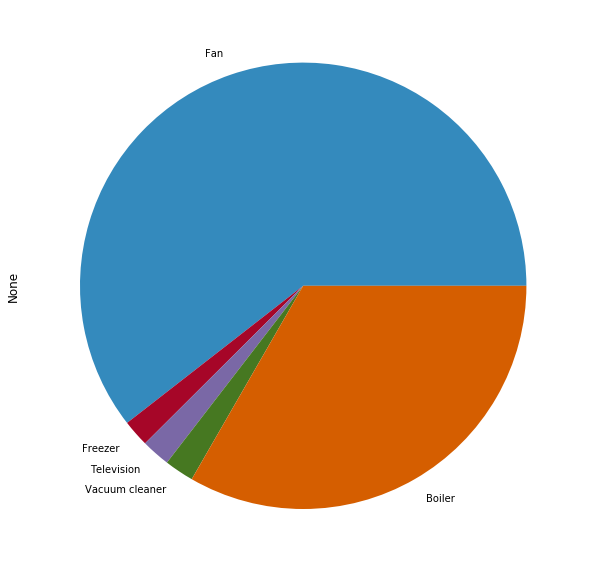

In [81]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Vacuum Cleaner

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 6 (Vacuum Cleaner).Primero veamos el timeframe.

In [82]:
vacuum_cleaner.get_timeframe()
#light.plot()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

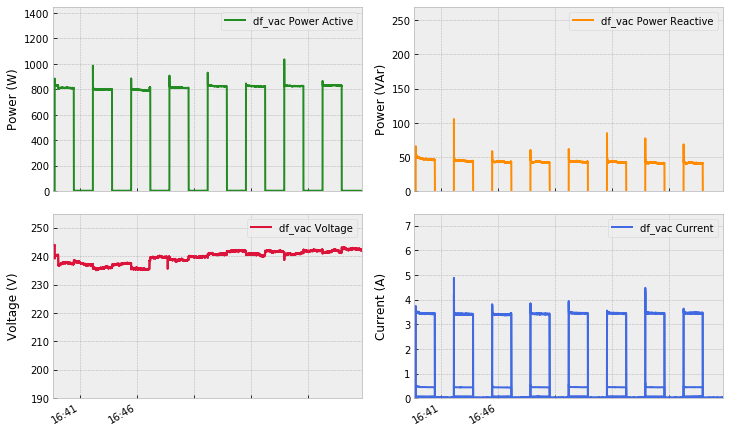

In [83]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vac['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_vac Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vac['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_vac Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vac['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_vac Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vac['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_vac Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['16:41','16:46'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_vac.svg', bbox_inches='tight', transparent=True)
pass

Ahora vemos la grafica de una aspiradora cuyo consumo es de uno 3.5Amp y no presenta potencia reactiva apreciable

### Freezer

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 4 (Freezer)

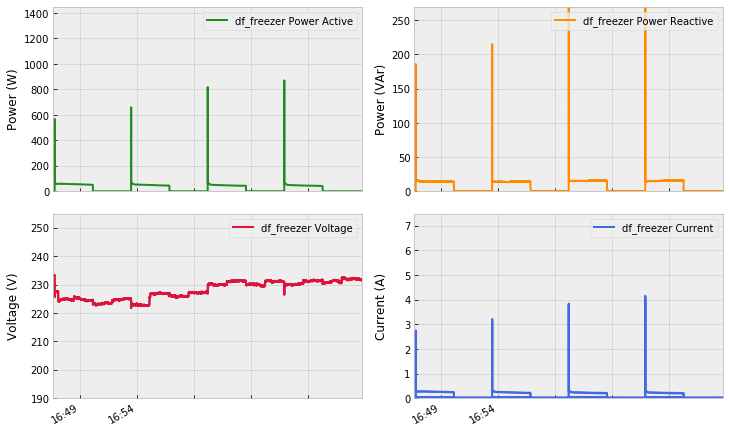

In [84]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_freezer['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_freezer['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_freezer['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_freezer['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['16:49','16:54'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_freezer.svg', bbox_inches='tight', transparent=True)
pass

Una nevera esta compuesta basicamente por un compresor  y su electronica asociada,motivo por el cual vemos un pico de potencia reactiva coincidiendo con el arranque del motor con su correspondiente pico de consumo y el potencia.

### Boiler

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

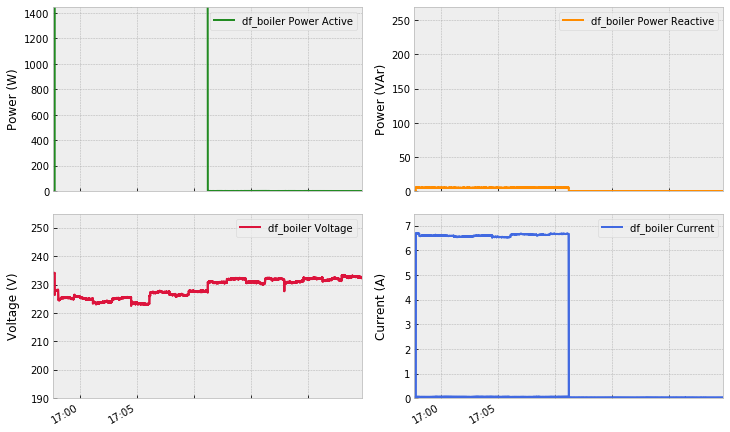

In [85]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_boiler['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_boiler Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_boiler['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_boiler Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_boiler['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_boiler Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_boiler['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_boiler Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['17:00','17:05'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

Como se deduce de los graficos , el hervidor esta compuesto unicamente por uan resistencia de alta potencia, motivo por el cual no presente medidas de potencia reactiva y todo sea potencia activa 

### Fan

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

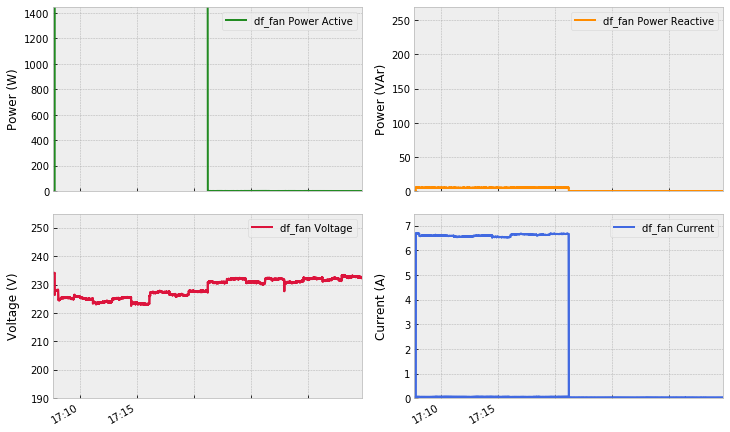

In [86]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

df_light = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_light['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_light['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_light['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_light['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['17:10','17:15'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_light.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de una luminaria de bajo consumo en la que al llevar una fuente conmutada practicamente consume el mismo nivel de potencia activa que el de reactiva. Ademas queda registrado un poequeño pico de corriente justo en el momento de encendido. 

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

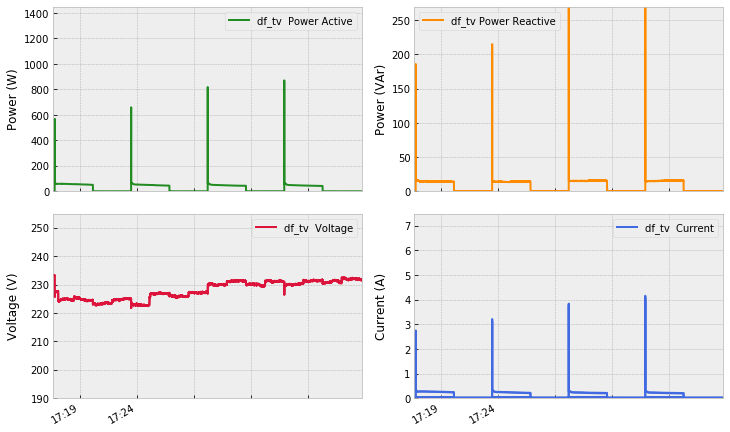

In [87]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_fan = next(elec[4].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['17:19','17:24'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de un pequeño ventilador cuyo consumo es casi inapreciable y no presenta energia reaciva. Es llamativo el hecho de que haya fluctuaciones apreciables en la grafica de la tension asi como  tambien un pequeño pico de corriente ( este hecho solo en el momento del arranque). 

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

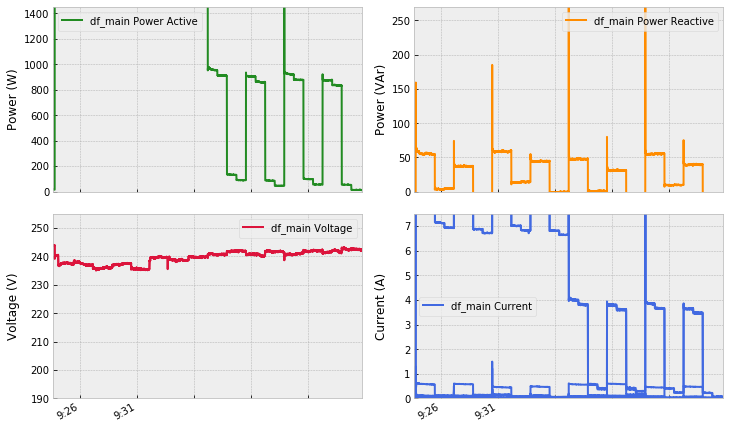

In [88]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_tv = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:26','9:31'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

Por ultimo vemos la grafica de un monitor cuyos resultado arroja tanto potencia activa como reactiva  ( por la fuente conmutada) pero ninguna fluctuacion en la tension ni en en la corriente 

### Trazar los electrodomésticos cuando estén en uso

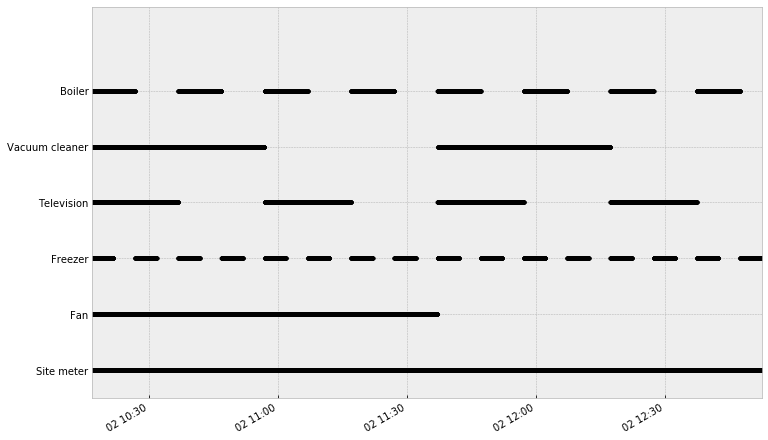

In [89]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

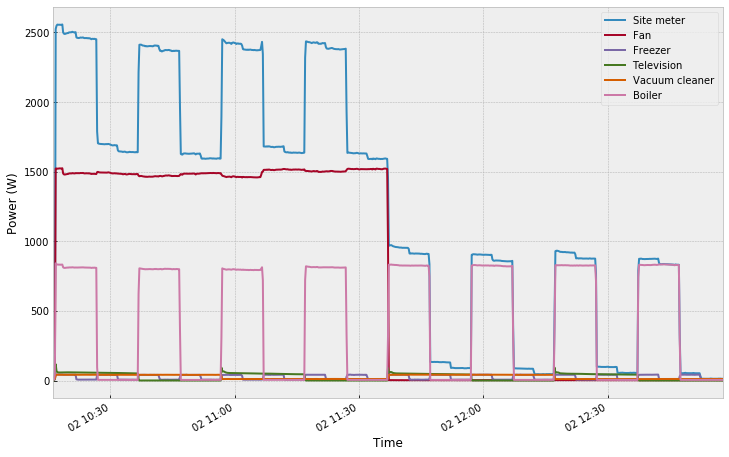

In [90]:
dsualmh.set_window(start='2022-02-02', end='2022-02-03')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [91]:
from pandas.plotting import autocorrelation_plot

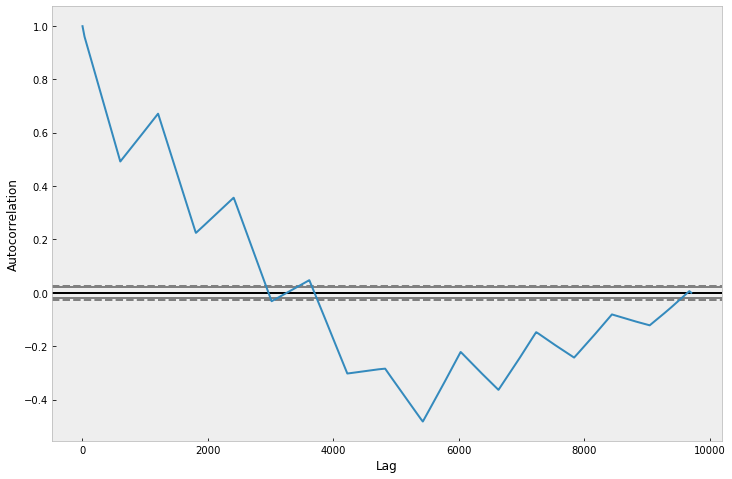

In [92]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [93]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

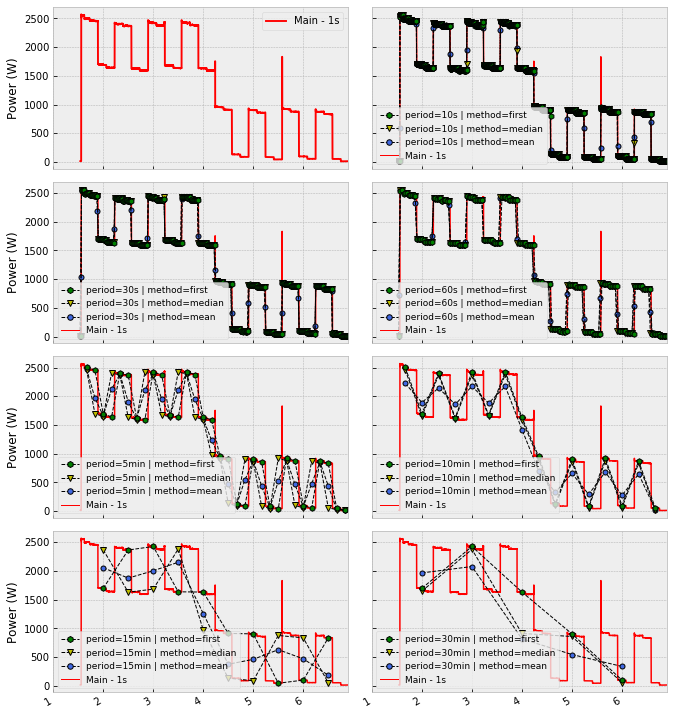

In [94]:
rcParams['figure.figsize'] = (11, 14)

#t0 = '2021-11-10 18:00:00+01:00'
#t1 = '2021-11-12 18:05:00+01:00'

t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2022-02-02 10:00:00+01:00','2022-02-02 12:57:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [95]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

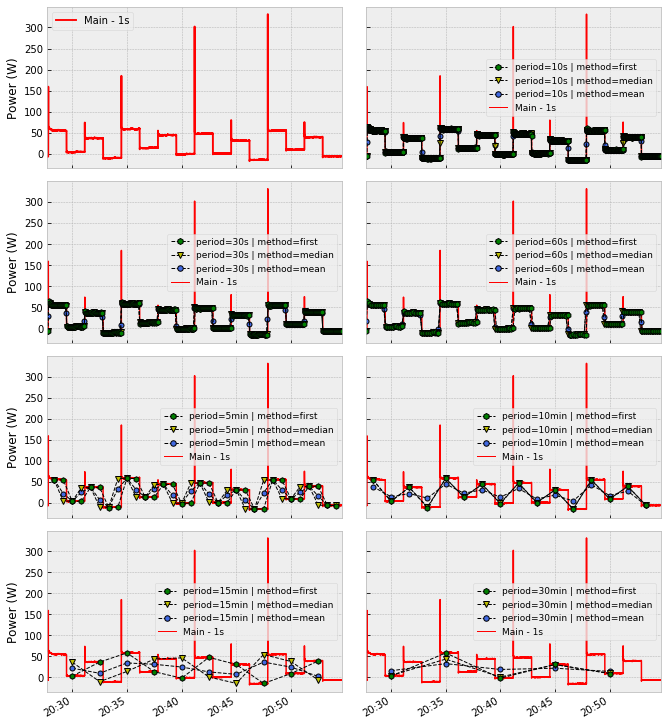

In [96]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))
#ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-12 18:05:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass